In [3]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str="{:.3f}[s]", prefix=None, suffix=None, sep=" "):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

%matplotlib inline

In [4]:
train_df = pd.read_csv("../data/train_utf.csv")
test_df = pd.read_csv("../data/test_utf.csv")

In [5]:
train_df.head()

,ID,種類,住所,最寄り駅1,最寄り駅2,最寄り駅3,築年数,階数,階,賃料,共益費,敷金/礼金,保証金,間取り,専有面積(m2)
0,1,賃貸アパート,東京都杉並区上荻４,ＪＲ中央線/西荻窪駅 歩12分,ＪＲ中央線/吉祥寺駅 バス14分 (バス停)西荻北五丁目 歩6分,ＪＲ中央線/荻窪駅 歩20分,築27年,2階建,1階,65000,0,1.0,0.00000,1K,18.23
1,2,賃貸マンション,大阪府大阪市港区築港３,地下鉄中央線/大阪港駅 歩4分,ＪＲ大阪環状線/弁天町駅 歩38分,阪神電鉄阪神なんば線/九条駅 歩57分,築34年,10階建,4階,38000,0,0.0,0.00000,1K,18.98
2,3,賃貸マンション,東京都中野区中央２,東京メトロ丸ノ内線/中野坂上駅 歩3分,ＪＲ中央線/中野駅 歩17分,ＪＲ総武線/東中野駅 歩12分,築16年,地下1地上10階建,6階,118000,10000,1.0,1.00000,2K,30.09
3,4,賃貸アパート,東京都北区中里３,ＪＲ山手線/駒込駅 歩9分,ＪＲ京浜東北線/上中里駅 歩10分,ＪＲ京浜東北線/田端駅 歩14分,築18年,2階建,1階,78000,2000,1.0,1.00000,1K,22.96
4,5,賃貸一戸建て,大阪府大阪市住之江区粉浜２,南海本線/粉浜駅 歩3分,阪堺電気軌道阪堺線/東粉浜駅 歩4分,阪堺電気軌道阪堺線/住吉駅 歩6分,築49年,2階建,2階,47000,0,0.0,2.12766,2LDK,72.06


In [6]:
test_df.describe()

,ID,共益費,敷金/礼金,保証金,専有面積(m2)
count,43749.0000,43749.000000,43749.000000,43749.000000,43749.00000
mean,21875.0000,5444.553910,0.540231,0.553905,29.92286
std,12629.3928,4051.334323,0.571983,0.588725,12.81008
min,1.0000,0.000000,0.000000,0.000000,2.05000
25%,10938.0000,3000.000000,0.000000,0.000000,21.51000
50%,21875.0000,5000.000000,0.500000,1.000000,25.79000
75%,32812.0000,8000.000000,1.000000,1.000000,35.01000
max,43749.0000,95000.000000,11.000000,16.800000,153.41000


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39006 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23492 missing from c

<AxesSubplot:>

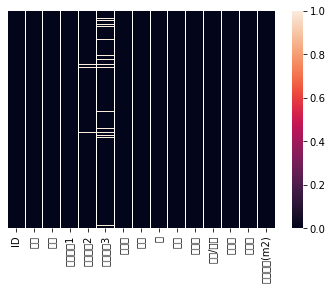

In [7]:
sns.heatmap(train_df.isnull(),yticklabels=False, xticklabels=True)

In [8]:
train_df.isnull().sum()

ID             0
種類             0
住所             0
最寄り駅1          0
最寄り駅2       1476
最寄り駅3       3854
築年数            0
階数             0
階              0
賃料             0
共益費            0
敷金/礼金          0
保証金            0
間取り            0
専有面積(m2)       0
dtype: int64

<AxesSubplot:>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12450 missing from c

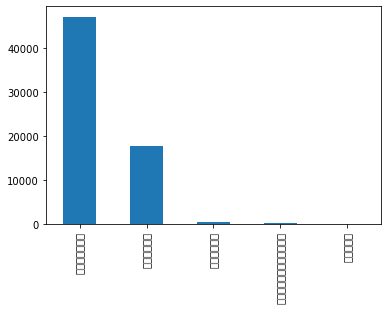

In [9]:
# 種類をOne Hot Encoding に変換
train_df["種類"].value_counts().plot(kind="bar")


In [10]:
def merge_by_id(left_df, right_df):
    return pd.merge(left_df["ID"], right_df, on="ID", how="left").drop(columns=["ID"])

In [11]:
def one_hot_encoding(input_df,val):
    out_df = pd.DataFrame()
    target_colname = val
    target_series = input_df[target_colname]
    unique_values = target_series.unique()

    for value in unique_values:
        is_value = target_series == value
        out_df[value] = is_value.astype(int)
    return out_df

In [12]:
# onehot encoding for 種類 test
out_df_train = one_hot_encoding(train_df,"種類")
out_df_test = one_hot_encoding(test_df,"種類")

In [13]:
out_df_train

,賃貸アパート,賃貸マンション,賃貸一戸建て,賃貸テラス・タウンハウス,賃貸その他
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
65613,0,1,0,0,0
65614,0,1,0,0,0
65615,1,0,0,0,0
65616,0,1,0,0,0


In [14]:
out_df_test

,賃貸アパート,賃貸マンション,賃貸テラス・タウンハウス,賃貸一戸建て,賃貸その他
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
43744,0,1,0,0,0
43745,0,1,0,0,0
43746,0,1,0,0,0
43747,0,1,0,0,0


In [12]:
train_df = train_df.join(out_df_train,how="left")

In [13]:
test_df = test_df.join(out_df_test,how="left")

In [14]:
# 検算
assert len(train_df) == len(out_df_train)
assert len(test_df) == len(out_df_test)


In [15]:
def create_room_type_count_encoding(input_df):
    count = input_df["間取り"].map(input_df["間取り"].value_counts())
    encoded_df = pd.DataFrame({
        "ID": input_df["ID"],
        "間取り_count": count
    })

    return pd.merge(input_df, encoded_df, on ="ID",how="left")

In [16]:
test_df = create_room_type_count_encoding(test_df)

In [17]:
train_df= create_room_type_count_encoding(train_df)

In [18]:
test_df.drop(["最寄り駅2","最寄り駅3"],axis=1,inplace=True)

In [19]:
train_df.drop(["最寄り駅2","最寄り駅3"],axis=1,inplace=True)


In [20]:
train_df.head()

,ID,種類,住所,最寄り駅1,築年数,階数,階,賃料,共益費,敷金/礼金,保証金,間取り,専有面積(m2),賃貸アパート,賃貸マンション,賃貸一戸建て,賃貸テラス・タウンハウス,賃貸その他,間取り_count
0,1,賃貸アパート,東京都杉並区上荻４,ＪＲ中央線/西荻窪駅 歩12分,築27年,2階建,1階,65000,0,1.0,0.00000,1K,18.23,1,0,0,0,0,29324
1,2,賃貸マンション,大阪府大阪市港区築港３,地下鉄中央線/大阪港駅 歩4分,築34年,10階建,4階,38000,0,0.0,0.00000,1K,18.98,0,1,0,0,0,29324
2,3,賃貸マンション,東京都中野区中央２,東京メトロ丸ノ内線/中野坂上駅 歩3分,築16年,地下1地上10階建,6階,118000,10000,1.0,1.00000,2K,30.09,0,1,0,0,0,1827
3,4,賃貸アパート,東京都北区中里３,ＪＲ山手線/駒込駅 歩9分,築18年,2階建,1階,78000,2000,1.0,1.00000,1K,22.96,1,0,0,0,0,29324
4,5,賃貸一戸建て,大阪府大阪市住之江区粉浜２,南海本線/粉浜駅 歩3分,築49年,2階建,2階,47000,0,0.0,2.12766,2LDK,72.06,0,0,1,0,0,3071


In [21]:
test_df.head()

,ID,種類,住所,最寄り駅1,築年数,階数,階,共益費,敷金/礼金,保証金,間取り,専有面積(m2),賃貸アパート,賃貸マンション,賃貸テラス・タウンハウス,賃貸一戸建て,賃貸その他,間取り_count
0,1,賃貸アパート,愛知県名古屋市中村区大秋町１,地下鉄東山線/本陣駅 歩3分,築10年,3階建,1階,5000,0.0,1.0,1LDK,49.21,1,0,0,0,0,5684
1,2,賃貸マンション,東京都杉並区西荻南３,ＪＲ中央線/西荻窪駅 歩3分,築3年,地下1地上11階建,8階,8000,1.0,0.0,1DK,25.10,0,1,0,0,0,3420
2,3,賃貸マンション,東京都新宿区荒木町,都営新宿線/曙橋駅 歩4分,築40年,3階建,3階,4000,1.0,1.0,ワンルーム,18.00,0,1,0,0,0,7459
3,4,賃貸マンション,東京都杉並区久我山２,京王井の頭線/富士見ヶ丘駅 歩1分,築55年,4階建,2階,0,1.0,0.0,1LDK,37.00,0,1,0,0,0,5684
4,5,賃貸マンション,宮城県仙台市青葉区旭ケ丘３,仙台市地下鉄南北線/旭ヶ丘駅 歩3分,築16年,5階建,4階,7000,0.0,1.0,1LDK,43.98,0,1,0,0,0,5684


In [22]:
test_df.drop(["間取り","種類"],axis=1,inplace=True)

In [23]:
train_df.drop(["種類","間取り"],axis=1,inplace=True)

In [24]:
train_bug = pd.DataFrame()
train_bug = train_df.copy()

In [25]:
test_df['階数'] = test_df['階数'].replace("平屋","1階建")

In [26]:
train_df['階数'] = train_df['階数'].replace("平屋","1階建")

In [27]:
train_df["階数"] = train_df["階数"].str.extract(r'(\d+)階建').astype(int)

In [28]:
test_df["階数"] = test_df["階数"].str.extract(r'(\d+)階建').astype(int)

In [29]:
train_df["築年数"] = train_df["築年数"].replace("新築","築1年")
train_df['築年数'] = train_df['築年数'].str.extract(r'(\d+)年').astype(int)

In [30]:
test_df["築年数"] = test_df["築年数"].replace("新築","築1年")
test_df['築年数'] = test_df['築年数'].str.extract(r'(\d+)年').astype(int)

In [31]:
train_df["最寄り駅1"] = train_df["最寄り駅1"].str.extract(r'(\d+)分')


In [32]:
test_df["最寄り駅1"] = test_df["最寄り駅1"].str.extract(r'(\d+)分')


In [33]:
def impute(var01):
    walk = var01[0]
    if pd.isnull(walk):
        return 10
    else:
        return walk


In [34]:
train_df["最寄り駅1"] = train_df[["最寄り駅1"]].apply(impute,axis=1)


In [35]:
test_df["最寄り駅1"] = test_df[["最寄り駅1"]].apply(impute,axis=1)


In [36]:
train_df["最寄り駅1"] = train_df["最寄り駅1"].astype(int)

In [37]:
# test_df["最寄り駅1"] = test_df["最寄り駅1"].astype(int) に変える
test_df["最寄り駅1"]= test_df["最寄り駅1"].astype(int)

In [38]:
train_df[['都道府県',"区"]] = train_df['住所'].str.split('都|県|道|府|市|区', expand=True).iloc[:, [0, -1]]

In [39]:
test_df[['都道府県',"区"]] = test_df['住所'].str.split('都|県|道|府|市|区', expand=True).iloc[:, [0, -1]]

In [40]:
train_df[["都道府県","区"]]

,都道府県,区
0,東京,None
1,大阪,None
2,東京,None
3,東京,None
4,大阪,None
...,...,...
65613,大阪,None
65614,宮城,None
65615,東京,None
65616,愛知,None


In [41]:
test_df.drop(["住所","区"],axis=1,inplace=True)

In [42]:
train_df.drop(["住所","区"],axis=1,inplace=True)

<AxesSubplot:>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38442 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30693 missing from c

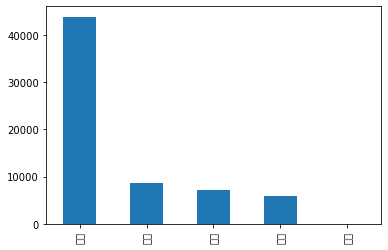

In [43]:
train_df["都道府県"].value_counts().plot(kind="bar")
# target_colname = "都道府県"
# target_series = train_df[target_colname]
# unique_values = target_series.unique()

In [44]:
state_df_01 = one_hot_encoding(train_df,"都道府県")
state_df_02 = one_hot_encoding(test_df,"都道府県")


In [45]:
state_df_01

,東京,大阪,愛知,宮城,北海
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
65613,0,1,0,0,0
65614,0,0,0,1,0
65615,1,0,0,0,0
65616,0,0,1,0,0


In [46]:
state_df_02

,愛知,東京,宮城,大阪,北海
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
43744,0,1,0,0,0
43745,0,1,0,0,0
43746,0,1,0,0,0
43747,0,1,0,0,0


In [47]:
train_df = train_df.join(state_df_01,how="left")

In [48]:
test_df = test_df.join(state_df_02,how="left")

In [49]:
train_df.drop(["都道府県","階"],axis=1,inplace=True)

In [50]:
test_df.drop(["都道府県","階"],axis=1,inplace=True)

In [51]:
train_df.dtypes

ID                int64
最寄り駅1             int64
築年数               int64
階数                int64
賃料                int64
共益費               int64
敷金/礼金           float64
保証金             float64
専有面積(m2)        float64
賃貸アパート            int64
賃貸マンション           int64
賃貸一戸建て            int64
賃貸テラス・タウンハウス      int64
賃貸その他             int64
間取り_count         int64
東京                int64
大阪                int64
愛知                int64
宮城                int64
北海                int64
dtype: object

In [52]:
test_df.dtypes

ID                int64
最寄り駅1             int64
築年数               int64
階数                int64
共益費               int64
敷金/礼金           float64
保証金             float64
専有面積(m2)        float64
賃貸アパート            int64
賃貸マンション           int64
賃貸テラス・タウンハウス      int64
賃貸一戸建て            int64
賃貸その他             int64
間取り_count         int64
愛知                int64
東京                int64
宮城                int64
大阪                int64
北海                int64
dtype: object

In [53]:
# 列の方向を合わせる
test_df = test_df.reindex(columns=["ID","最寄り駅1","築年数","階数","共益費","敷金/礼金","保証金","専有面積(m2)" ,"賃貸アパート","賃貸マンション","賃貸一戸建て","賃貸テラス・タウンハウス","賃貸その他","間取り_count","東京","大阪","愛知","宮城","北海"])

In [54]:
X = train_df.drop(["賃料","ID","間取り_count"],axis=1)
y = train_df['賃料']

In [55]:
X

,最寄り駅1,築年数,階数,共益費,敷金/礼金,保証金,専有面積(m2),賃貸アパート,賃貸マンション,賃貸一戸建て,賃貸テラス・タウンハウス,賃貸その他,東京,大阪,愛知,宮城,北海
0,12,27,2,0,1.0,0.000000,18.23,1,0,0,0,0,1,0,0,0,0
1,4,34,10,0,0.0,0.000000,18.98,0,1,0,0,0,0,1,0,0,0
2,3,16,10,10000,1.0,1.000000,30.09,0,1,0,0,0,1,0,0,0,0
3,9,18,2,2000,1.0,1.000000,22.96,1,0,0,0,0,1,0,0,0,0
4,3,49,2,0,0.0,2.127660,72.06,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65613,4,2,15,6820,0.0,1.288245,21.66,0,1,0,0,0,0,1,0,0,0
65614,5,36,12,11000,3.0,1.000000,59.76,0,1,0,0,0,0,0,0,1,0
65615,8,16,2,3000,1.0,1.000000,46.35,1,0,0,0,0,1,0,0,0,0
65616,10,1,15,7000,0.0,0.000000,24.85,0,1,0,0,0,0,0,1,0,0


In [56]:
X = train_df.drop(["賃料","ID","間取り_count"],axis=1).values
y = train_df['賃料'].values

In [57]:
# from sklearn.model_selection import StratifiedKFold
# そもそもStratifiedじゃない物を使うのを検討する
# Stratified で「賃料」
# fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=510)
# cv = fold.split(X, y)
# # CVの切り方について見直しを行ったほうが良い
# cv = list(cv)
#

from sklearn.model_selection import KFold
fold = KFold(n_splits=5, shuffle=True, random_state=71)
cv = list(fold.split(X, y)) # もともとが generator なため明示的に list に変換する
# oof, models = fit_lgbm(X, y, cv, params=params, verbose=500)


In [58]:
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    """mean_squared_error の root (0.5乗)"""
    return mean_squared_error(y_true, y_pred) ** .5

In [59]:
import lightgbm as lgbm

def fit_lgbm(X, 
             y, 
             cv, 
             params: dict=None, 
             verbose: int=50):
    """lightGBM を CrossValidation の枠組みで学習を行なう function"""

    # パラメータがないときは、空の dict で置き換える
    if params is None:
        params = {}

    models = []
    n_records = len(X)
    # training data の target と同じだけのゼロ配列を用意
    oof_pred = np.zeros((n_records, ), dtype=np.float32)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を trian/valid に分割
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)

        with Timer(prefix="fit fold={} ".format(i)):

            # cv 内で train に定義された x_train で学習する
            clf.fit(x_train, y_train, 
                    eval_set=[(x_valid, y_valid)],  
                    early_stopping_rounds=100,
                    verbose=verbose)

        # cv 内で validation data とされた x_valid で予測をして oof_pred に保存していく
        # oof_pred は全部学習に使わなかったデータの予測結果になる → モデルの予測性能を見る指標として利用できる
        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        score = root_mean_squared_error(y_valid, pred_i)
        print(f" - fold{i + 1} - {score:.4f}")

    score = root_mean_squared_error(y, oof_pred)

    print("=" * 50)
    print(f"FINISHI: Whole Score: {score:.4f}")
    return oof_pred, models

In [60]:
params = {
    # 目的関数. これの意味で最小となるようなパラメータを探します. 
    "objective": "rmse", 

    # 木の最大数. early_stopping という枠組みで木の数は制御されるようにしていますのでとても大きい値を指定しておきます.
    "n_estimators": 10000, 

     # 学習率. 小さいほどなめらかな決定境界が作られて性能向上に繋がる場合が多いです、
    # がそれだけ木を作るため学習に時間がかかります
    "learning_rate": .1,

    # 特徴重要度計算のロジック(後述)
    "importance_type": "gain", 
    "random_state": 510,
}

oof, models = fit_lgbm(X, y=y, params=params, cv=cv)

Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 11336.8
[100]	valid_0's rmse: 11080.5
[150]	valid_0's rmse: 10982.4
[200]	valid_0's rmse: 10888.1
[250]	valid_0's rmse: 10827.4
[300]	valid_0's rmse: 10785.3
[350]	valid_0's rmse: 10747.5
[400]	valid_0's rmse: 10703.4
[450]	valid_0's rmse: 10672.4
[500]	valid_0's rmse: 10636.9
[550]	valid_0's rmse: 10619.9
[600]	valid_0's rmse: 10601
[650]	valid_0's rmse: 10584.2
[700]	valid_0's rmse: 10568.6
[750]	valid_0's rmse: 10547.8
[800]	valid_0's rmse: 10528.8
[850]	valid_0's rmse: 10513.2
[900]	valid_0's rmse: 10492.6
[950]	valid_0's rmse: 10480.3
[1000]	valid_0's rmse: 10469.7
[1050]	valid_0's rmse: 10455.9
[1100]	valid_0's rmse: 10448.5
[1150]	valid_0's rmse: 10434.7
[1200]	valid_0's rmse: 10426.4
[1250]	valid_0's rmse: 10425.9
[1300]	valid_0's rmse: 10415.5
[1350]	valid_0's rmse: 10412.3
[1400]	valid_0's rmse: 10405.3
[1450]	valid_0's rmse: 10400.4
[1500]	valid_0's rmse: 10397
[1550]	valid_0's rmse: 10395.9
[

In [73]:
root_mean_squared_error(y_true=y, y_pred=oof)


10332.26667336561

In [61]:
def visualize_importance(models, feat_train_df):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現します.

    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["feature_importance"] = model.feature_importances_
        _df["column"] = feat_train_df.columns
        _df["fold"] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby("column")\
        .sum()[["feature_importance"]]\
        .sort_values("feature_importance", ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(12, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x="feature_importance", 
                  y="column", 
                  order=order, 
                  ax=ax, 
                  palette="viridis", 
                  orient="h")
    ax.tick_params(axis="x", rotation=90)
    ax.set_title("Importance")
    ax.grid()
    fig.tight_layout()
    return fig, ax

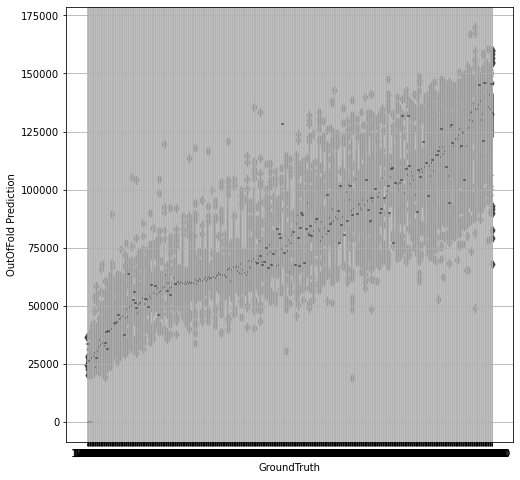

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.boxenplot(data=pd.DataFrame({ "GroundTruth": y, "OutOfFold Prediction": oof }), 
              x="GroundTruth", y="OutOfFold Prediction", ax=ax)

ax.grid()
ax.plot([0, 9], [1, 10], "--", c="black", alpha=.2)

In [62]:
z = test_df.drop(["ID","間取り_count"],axis=1)

In [63]:
z

,最寄り駅1,築年数,階数,共益費,敷金/礼金,保証金,専有面積(m2),賃貸アパート,賃貸マンション,賃貸一戸建て,賃貸テラス・タウンハウス,賃貸その他,東京,大阪,愛知,宮城,北海
0,3,10,3,5000,0.0,1.0,49.21,1,0,0,0,0,0,0,1,0,0
1,3,3,11,8000,1.0,0.0,25.10,0,1,0,0,0,1,0,0,0,0
2,4,40,3,4000,1.0,1.0,18.00,0,1,0,0,0,1,0,0,0,0
3,1,55,4,0,1.0,0.0,37.00,0,1,0,0,0,1,0,0,0,0
4,3,16,5,7000,0.0,1.0,43.98,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43744,3,21,8,3000,1.0,1.0,25.00,0,1,0,0,0,1,0,0,0,0
43745,20,45,5,0,1.0,0.0,34.00,0,1,0,0,0,1,0,0,0,0
43746,5,19,13,0,1.0,1.0,21.56,0,1,0,0,0,1,0,0,0,0
43747,4,24,7,7000,1.0,1.0,27.58,0,1,0,0,0,1,0,0,0,0


In [78]:
test_df

,ID,最寄り駅1,築年数,階数,共益費,敷金/礼金,保証金,専有面積(m2),賃貸アパート,賃貸マンション,賃貸一戸建て,賃貸テラス・タウンハウス,賃貸その他,間取り_count,東京,大阪,愛知,宮城,北海
0,1,3,10,3,5000,0.0,1.0,49.21,1,0,0,0,0,5684,0,0,1,0,0
1,2,3,3,11,8000,1.0,0.0,25.10,0,1,0,0,0,3420,1,0,0,0,0
2,3,4,40,3,4000,1.0,1.0,18.00,0,1,0,0,0,7459,1,0,0,0,0
3,4,1,55,4,0,1.0,0.0,37.00,0,1,0,0,0,5684,1,0,0,0,0
4,5,3,16,5,7000,0.0,1.0,43.98,0,1,0,0,0,5684,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43744,43745,3,21,8,3000,1.0,1.0,25.00,0,1,0,0,0,19602,1,0,0,0,0
43745,43746,20,45,5,0,1.0,0.0,34.00,0,1,0,0,0,5684,1,0,0,0,0
43746,43747,5,19,13,0,1.0,1.0,21.56,0,1,0,0,0,19602,1,0,0,0,0
43747,43748,4,24,7,7000,1.0,1.0,27.58,0,1,0,0,0,19602,1,0,0,0,0


In [64]:
# k 個のモデルの予測を作成. shape = (5, N_test,).
pred = np.array([model.predict(z.values) for model in models])

# k 個のモデルの予測値の平均 shape = (N_test,).
pred = np.mean(pred, axis=0) # 

In [66]:
pd.DataFrame({
    "ID":test_df["ID"],
    "predict": pred
}).to_csv(os.path.join("./OUTPUT_DIR", "#5__submission.csv"), index=False)

In [ ]:
train_df

,ID,最寄り駅1,築年数,階数,賃料,共益費,敷金/礼金,保証金,専有面積(m2),賃貸アパート,賃貸マンション,賃貸一戸建て,賃貸テラス・タウンハウス,賃貸その他,間取り_count,東京,大阪,愛知,宮城,北海
0,1,12,27,2,65000,0,1.0,0.000000,18.23,1,0,0,0,0,29324,1,0,0,0,0
1,2,4,34,10,38000,0,0.0,0.000000,18.98,0,1,0,0,0,29324,0,1,0,0,0
2,3,3,16,10,118000,10000,1.0,1.000000,30.09,0,1,0,0,0,1827,1,0,0,0,0
3,4,9,18,2,78000,2000,1.0,1.000000,22.96,1,0,0,0,0,29324,1,0,0,0,0
4,5,3,49,2,47000,0,0.0,2.127660,72.06,0,0,1,0,0,3071,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65613,65614,4,2,15,62100,6820,0.0,1.288245,21.66,0,1,0,0,0,29324,0,1,0,0,0
65614,65615,5,36,12,99000,11000,3.0,1.000000,59.76,0,1,0,0,0,3618,0,0,0,1,0
65615,65616,8,16,2,132000,3000,1.0,1.000000,46.35,1,0,0,0,0,8353,1,0,0,0,0
65616,65617,10,1,15,59000,7000,0.0,0.000000,24.85,0,1,0,0,0,29324,0,0,1,0,0


In [ ]:
test_df

,最寄り駅1,築年数,階数,共益費,敷金/礼金,保証金,専有面積(m2),賃貸アパート,賃貸マンション,賃貸一戸建て,賃貸テラス・タウンハウス,賃貸その他,東京,大阪,愛知,宮城,北海
0,3,10,3,5000,0.0,1.0,49.21,1,0,0,0,0,1,0,0,0,0
1,3,3,11,8000,1.0,0.0,25.10,0,1,0,0,0,0,1,0,0,0
2,4,40,3,4000,1.0,1.0,18.00,0,1,0,0,0,1,0,0,0,0
3,1,55,4,0,1.0,0.0,37.00,0,1,0,0,0,1,0,0,0,0
4,3,16,5,7000,0.0,1.0,43.98,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43744,3,21,8,3000,1.0,1.0,25.00,0,1,0,0,0,0,1,0,0,0
43745,20,45,5,0,1.0,0.0,34.00,0,1,0,0,0,1,0,0,0,0
43746,5,19,13,0,1.0,1.0,21.56,0,1,0,0,0,1,0,0,0,0
43747,4,24,7,7000,1.0,1.0,27.58,0,1,0,0,0,1,0,0,0,0
